# NLP Assignment 1 (40% of grade): Sentiment Analysis from Tweets

This coursework will involve you implementing functions for a text classifier, which you will train to identify the **sentiment expressed in a text** in a dataset of approx. 27,000 entries, which will be split into a 80%/20% training/test split. 

In this template you are given the basis for that implementation, though some of the functions are missing, which you have to fill in.

Follow the instructions file **NLP_Assignment_1_Instructions.pdf** for details of each question - the outline of what needs to be achieved for each question is as below.

You must submit all **ipython notebooks and extra resources you need to run the code if you've added them** in the code submission, and a **2 page report (pdf)** in the report submission on QMPlus where you report your methods and findings according to the instructions file for each question.

## Downloads, Package Imports, Data Loading and Splitting

In [58]:
pip install nltk

Note: you may need to restart the kernel to use updated packages.


In [59]:
pip install pandas

Note: you may need to restart the kernel to use updated packages.


In [60]:
pip install numpy

Note: you may need to restart the kernel to use updated packages.


In [61]:
pip install --upgrade pip

Note: you may need to restart the kernel to use updated packages.


In [62]:
import csv                               # csv reader
from sklearn.svm import LinearSVC
from nltk.classify import SklearnClassifier
from sklearn.pipeline import Pipeline
from sklearn.metrics import precision_recall_fscore_support # to report on precision and recall
import numpy as np
import re

**Minor Update to `split_and_preprocess_data(percentage)`**: Here I have added 2 more lines of code which populate 2 more global lists train_data_1 and test_data_1. These lists contain tuples with the original text, the features as well as the labels, which is useful for storing false positives/negatives later. 

In [63]:
def load_data(path):
    """Load data from a tab-separated file and append it to raw_data."""
    with open(path) as f:
        reader = csv.reader(f, delimiter='\t')
        for line in reader:
            if line[0] == "Id":  # skip header
                continue
            (label, text) = parse_data_line(line)
            raw_data.append((text, label))

def split_and_preprocess_data(percentage):
    """Split the data between train_data and test_data according to the percentage
    and performs the preprocessing."""
    num_samples = len(raw_data)
    num_training_samples = int((percentage * num_samples))
    for (text, label) in raw_data[:num_training_samples]:
        train_data.append((to_feature_vector(pre_process(text)),label))
        train_data_1.append((text, to_feature_vector(pre_process(text)),label))
    for (text, label) in raw_data[num_training_samples:]:
        test_data.append((to_feature_vector(pre_process(text)),label))
        test_data_1.append((text, to_feature_vector(pre_process(text)),label))

# Question 1: Input and Basic preprocessing (10 marks)

1. `parse_data_line()`: Extracts the text samples and the associated labels from each line of data passed to the function and retutrs it as a tuple.
2. `pre-process()`:  Employs the same methods as in Lab 1 to perform some pre-processing on the dataset. Some details about the preprocessing:
    - *Punctuation Separation*: Here regex operations are used to separate punctuation marks before and after the end of a word.
    - *Normalization*: Lowercases the text, this should reduce ambiguity for cases such where words like "UK" and "uk" are in the same text.
    - *Tokenisation*: Split the text on trailing spaces to obtain individual words or unigrams.

In [64]:
def parse_data_line(data_line):
    """ Should return a tuple of the label as just positive or negative and the statement e.g. (label, statement)"""
    _, label, statement = data_line
    return (label, statement)

In [65]:

# Input: a string of one statement
def pre_process(text):
    """ 
    Performs Punctuation Separation and Lowercases the text (Normalization), followed by tokenizing the preprocessed text.

    Parameters:
    text (string): passes a line of text (assume sentence segmentation has already been done)

    Returns:
    List[string]: Should return a list of tokens.
    """
    # # #  THE CODE BELOW WAS TAKEN FROM preProcess() FUNCTION GIVEN IN LAB 1
    
    # print("original:", text)
    # sentence segmentation - assume already done
    # word tokenisation
    text = re.sub(r"(\w)([.,;:!?'\"”\)])", r"\1 \2", text) # separates punctuation at ends of strings
    text = re.sub(r"([.,;:!?'\"“\(\)])(\w)", r"\1 \2", text) # separates punctuation at beginning of strings
    # print("tokenising:", text)
    tokens = re.split(r"\s+",text)
    # normalisation - only by lower casing for now
    tokens = [t.lower() for t in tokens]
    return tokens

# Question 2: Basic Feature Extraction (20 marks)

I make use of a "bag of words" representation for the features which converts tokens into frequency dictionaries. I have also populated the global feature dictionary to observe how many overall features are created after applying this function upon the entire dataset. To populate the global feature dictionary, I use the set of unique tokens for the current list of tokens. 

In [66]:
global_feature_dict = {} # A global dictionary of features

def to_feature_vector(tokens):
    """ Should return a dictionary containing features as keys, and weights as values eg.({"Feature 1" : 10, "Feature 2": 20 ...})"""
    feature_dict = {}
    unique_tokens = set(tokens)
    for token in tokens:
        feature_dict[token] = feature_dict.get(token, 0) + 1
    for token in unique_tokens:
        global_feature_dict[token] = global_feature_dict.get(token, 0) + 1
    return feature_dict

In [67]:
# TRAINING AND VALIDATING OUR CLASSIFIER

def train_classifier(data):
    print("Training Classifier...")
    pipeline =  Pipeline([('svc', LinearSVC())])
    return SklearnClassifier(pipeline).train(data)

# Question 3: Cross-validation (20 marks)

The `cross_validate()` function performs K-fold cross validation. The function returns a list of the performance metrics for each fold. For each fold, current fold of data represents the test data and the remaining k-1 fold represent the training data. For the performance metrics I made use of the `precision_recall_fscore_support()` and `accuracy_score()` functions from `sklearn`. I used `precision_recall_fscore_support()` as it returns the metrics in an easy to extract way compared to `classification_report()`. The metrics are appended to the local variable `cv_results` which is then appended to the results variable returned by the function. 

In [68]:
#solution
from sklearn.metrics import precision_recall_fscore_support, accuracy_score


def cross_validate(dataset, folds):
    """
    Performs K-fold Cross Validation and returns Performance Metrics for each fold in a list. 
    The metrics returned are Precision, Recall, F1-score and Accuracy.

    Parameters:
    Dataset -> List[Tuple(string, string)]
    Folds -> int

    Returns:
    List[np.array([...]), np.array([...]), np.array([...]), float]
    """
    
    results = []
    fold_size = int(len(dataset)/folds) + 1
    
    for i in range(0,len(dataset),int(fold_size)):
        # insert code here that trains and tests on the 10 folds of data in the dataset
        print("Fold start on items %d - %d" % (i, i+fold_size))
        # FILL IN THE METHOD HERE
        train_data, test_data  = dataset[:i]+dataset[i+fold_size:], dataset[i:i+fold_size]
        test_inputs, test_labels = [data[0] for data in dataset], [data[1] for data in dataset]
        classifier = train_classifier(train_data)
        predicted_labels = predict_labels(test_inputs, classifier)
        # report = classification_report(test_labels, predicted_labels, output_dict=True)
        # results.append(report)
        precision, recall, fscore, _ = precision_recall_fscore_support(test_labels, predicted_labels)
        accuracy = accuracy_score(test_labels, predicted_labels)
        cv_results = [precision, recall, fscore, accuracy]
        results.append(cv_results)
    return results

In [69]:
# PREDICTING LABELS GIVEN A CLASSIFIER

def predict_labels(samples, classifier):
    """Assuming preprocessed samples, return their predicted labels from the classifier model."""
    return classifier.classify_many(samples)

def predict_label_from_raw(sample, classifier):
    """Assuming raw text, return its predicted label from the classifier model."""
    return classifier.classify(to_feature_vector(pre_process(reviewSample)))

## Populating Raw Data, Train Data and Test Data

Here I have added two new variables named train_data_1 and test_data_1 which contain the same data as train_data and test_data but also contain the original texts as part of the tuples. This variables helps when storing the false positives and negatives in a separate file as I also wanted to retain the original text for the error analysis.

In [70]:
# MAIN

# loading reviews
# initialize global lists that will be appended to by the methods below
raw_data = []          # the filtered data from the dataset file
train_data = []        # the pre-processed training data as a percentage of the total dataset
test_data = []         # the pre-processed test data as a percentage of the total dataset

# This version of the varibales with contain the original text, features as well as the labels for train and test data

train_data_1 = []      
test_data_1 = []  


# references to the data files
data_file_path = 'sentiment-dataset.tsv'

# Do the actual stuff (i.e. call the functions we've made)
# We parse the dataset and put it in a raw data list
print("Now %d rawData, %d trainData, %d testData" % (len(raw_data), len(train_data), len(test_data)),
      "Preparing the dataset...",sep='\n')

load_data(data_file_path) 

# We split the raw dataset into a set of training data and a set of test data (80/20)
# You do the cross validation on the 80% (training data)
# We print the number of training samples and the number of features before the split
print("Now %d rawData, %d trainData, %d testData" % (len(raw_data), len(train_data), len(test_data)),
      "Preparing training and test data...",sep='\n')

split_and_preprocess_data(0.8)

# We print the number of training samples and the number of features after the split
print("After split, %d rawData, %d trainData, %d testData" % (len(raw_data), len(train_data), len(test_data)),
      "Training Samples: ", len(train_data), "Features: ", len(global_feature_dict), sep='\n')


Now 0 rawData, 0 trainData, 0 testData
Preparing the dataset...
Now 33540 rawData, 0 trainData, 0 testData
Preparing training and test data...
After split, 33540 rawData, 26832 trainData, 6708 testData
Training Samples: 
26832
Features: 
64640


In [71]:
cv = cross_validate(train_data, 10)  # will work and output overall performance of p, r, f-score when cv implemented

Fold start on items 0 - 2684
Training Classifier...
Fold start on items 2684 - 5368
Training Classifier...
Fold start on items 5368 - 8052
Training Classifier...
Fold start on items 8052 - 10736
Training Classifier...
Fold start on items 10736 - 13420
Training Classifier...
Fold start on items 13420 - 16104
Training Classifier...
Fold start on items 16104 - 18788
Training Classifier...
Fold start on items 18788 - 21472
Training Classifier...
Fold start on items 21472 - 24156
Training Classifier...
Fold start on items 24156 - 26840
Training Classifier...


In [72]:
cv, len(cv[0][0])

([[array([0.98143726, 0.98626561]),
   array([0.97393084, 0.99025586]),
   array([0.97766964, 0.9882567 ]),
   0.9846079308288611],
  [array([0.97757654, 0.98775347]),
   array([0.97683938, 0.98814747]),
   array([0.97720782, 0.98795043]),
   0.9842352415026834],
  [array([0.97049004, 0.98449877]),
   array([0.97069913, 0.98438657]),
   array([0.97059457, 0.98444267]),
   0.9796511627906976],
  [array([0.97906497, 0.98540851]),
   array([0.97231498, 0.98900222]),
   array([0.97567831, 0.98720209]),
   0.9832289803220036],
  [array([0.97908539, 0.98591229]),
   array([0.9732845 , 0.98900222]),
   array([0.97617633, 0.98745484]),
   0.9835644007155635],
  [array([0.98264454, 0.98728212]),
   array([0.97586987, 0.99088267]),
   array([0.97924549, 0.98907912]),
   0.9856887298747764],
  [array([0.98147948, 0.98744247]),
   array([0.97619304, 0.99025586]),
   array([0.97882912, 0.98884716]),
   0.9853905784138343],
  [array([0.97815508, 0.98646574]),
   array([0.97436174, 0.98848937]),
   a

# Question 4: Error Analysis (20 marks)

Here I recreate the first fold of the cross validation to obtain the confusion matrix heat map.

In [73]:
from sklearn import metrics
import matplotlib.pyplot as plt
# a function to make the confusion matrix readable and pretty
def confusion_matrix_heatmap(y_test, preds, labels):
    """Function to plot a confusion matrix"""
    # pass labels to the confusion matrix function to ensure right order
    # cm = metrics.confusion_matrix(y_test, preds, labels)
    cm = metrics.confusion_matrix(y_test, preds, labels=labels)
    fig = plt.figure(figsize=(10,10))
    ax = fig.add_subplot(111)
    cax = ax.matshow(cm)
    plt.title('Confusion matrix of the classifier')
    fig.colorbar(cax)
    ax.set_xticks(np.arange(len(labels)))
    ax.set_yticks(np.arange(len(labels)))
    ax.set_xticklabels( labels, rotation=45)
    ax.set_yticklabels( labels)

    for i in range(len(cm)):
        for j in range(len(cm)):
            text = ax.text(j, i, cm[i, j],
                           ha="center", va="center", color="w")

    plt.xlabel('Predicted')
    plt.ylabel('True')
    
    # fix for mpl bug that cuts off top/bottom of seaborn viz:
    b, t = plt.ylim() # discover the values for bottom and top
    b += 0.5 # Add 0.5 to the bottom
    t -= 0.5 # Subtract 0.5 from the top
    plt.ylim(b, t) # update the ylim(bottom, top) values
    plt.show() # ta-da!
    plt.show()

## Testing on First fold of cross validation

In [74]:
fold_size = int(len(train_data)/10) + 1
train_data_2, test_data_2  = train_data_1[fold_size:], train_data_1[:fold_size]
test_text, test_inputs, test_labels = [data[0] for data in test_data_2], [data[1] for data in test_data_2], [data[2] for data in test_data_2]
classifier = train_classifier(train_data[fold_size:])
predicted_labels = predict_labels(test_inputs, classifier)

Training Classifier...


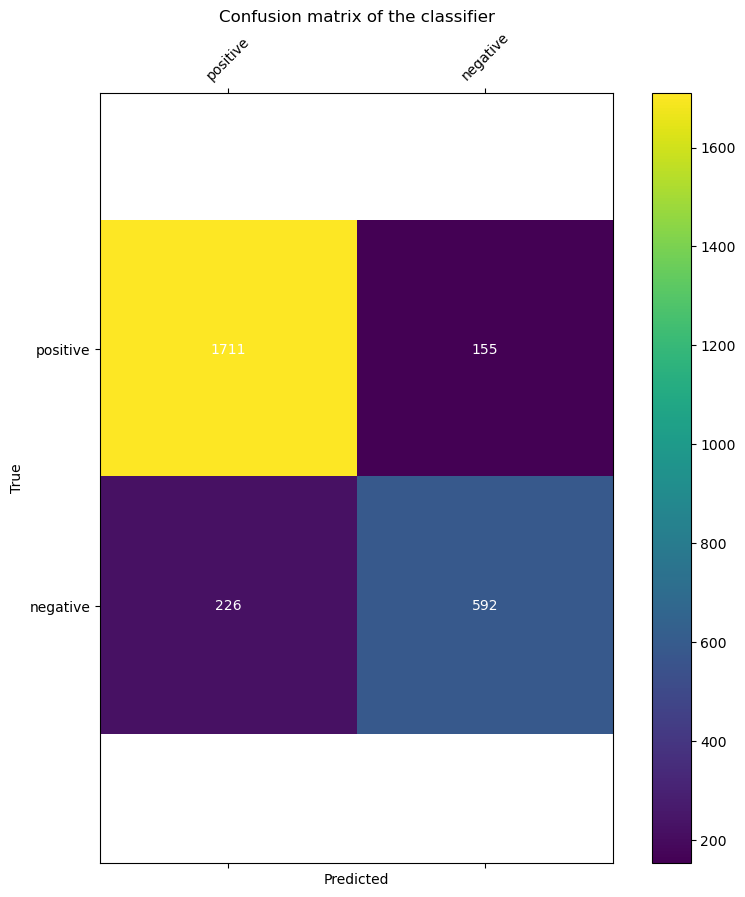

In [75]:
confusion_matrix_heatmap(test_labels, predicted_labels, ["positive", "negative"])


## Storing False Positives and Negatives in a separate file

Here I store the False Positives and Negatives in a separate file ("false_positives_and_negatives.tsv"). The file stores the original text, features, Predicted Label and True Labels. I zip the values of test_data_1 and predicted labels and iterate over it and check if the predicted and true labels differ value (indicating false positive/negative).

In [76]:
output_fp_fn_path = "false_positives_and_negatives.tsv"

with open(output_fp_fn_path, "w") as f:
    f.write("Original Text\tFeatures\tPredicted Label\tGround Truth Label\n")
    for (text, features, true_label), pred_label in zip(test_data_1, predicted_labels):
        if pred_label != true_label:
            f.write(f"{text}\t{features}\t{pred_label}\t{true_label}\n")
print("Successfully saved False Positives/Negatives to", output_fp_fn_path)

Successfully saved False Positives/Negatives to false_positives_and_negatives.tsv
